# Example on plotting the sensor population plot for LinoSPAD2

This example shows the different parameters of the sensor_plot.plot_sensor_population() function and how they can be utilized. The most straightforward way to use the function is to provide the path to the folder with the '.dat' data files and provide the daughterboard and motherboard numbers together with the firmware version that was used during data collecting and the number of timestamps per TDC per cycle (the same that was set in the LinoSPAD communication software). If all these parameters were set right, the function will analyze all '.dat' files found in the provided folder and plot the results. The masking of the hot pixels is done by default. The calibration does not affect the number of photons detected in each pixel so those parameters are not used.

First, import the module 'sensor_plot' and set the path to the folder with the '.dat' data files to be analyzed.

In [ ]:
from daplis.functions import sensor_plot

path = r'D:\LinoSPAD2\Data\B7d\Ne640\Ne640P'


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\Ne640\Ne640P < < <




> > > Plotting < < <

> > > The plot is saved as '0000010933-0000017289.png' in D:\LinoSPAD2\Data\B7d\Ne640\Ne640P\results\sensor_population < < <


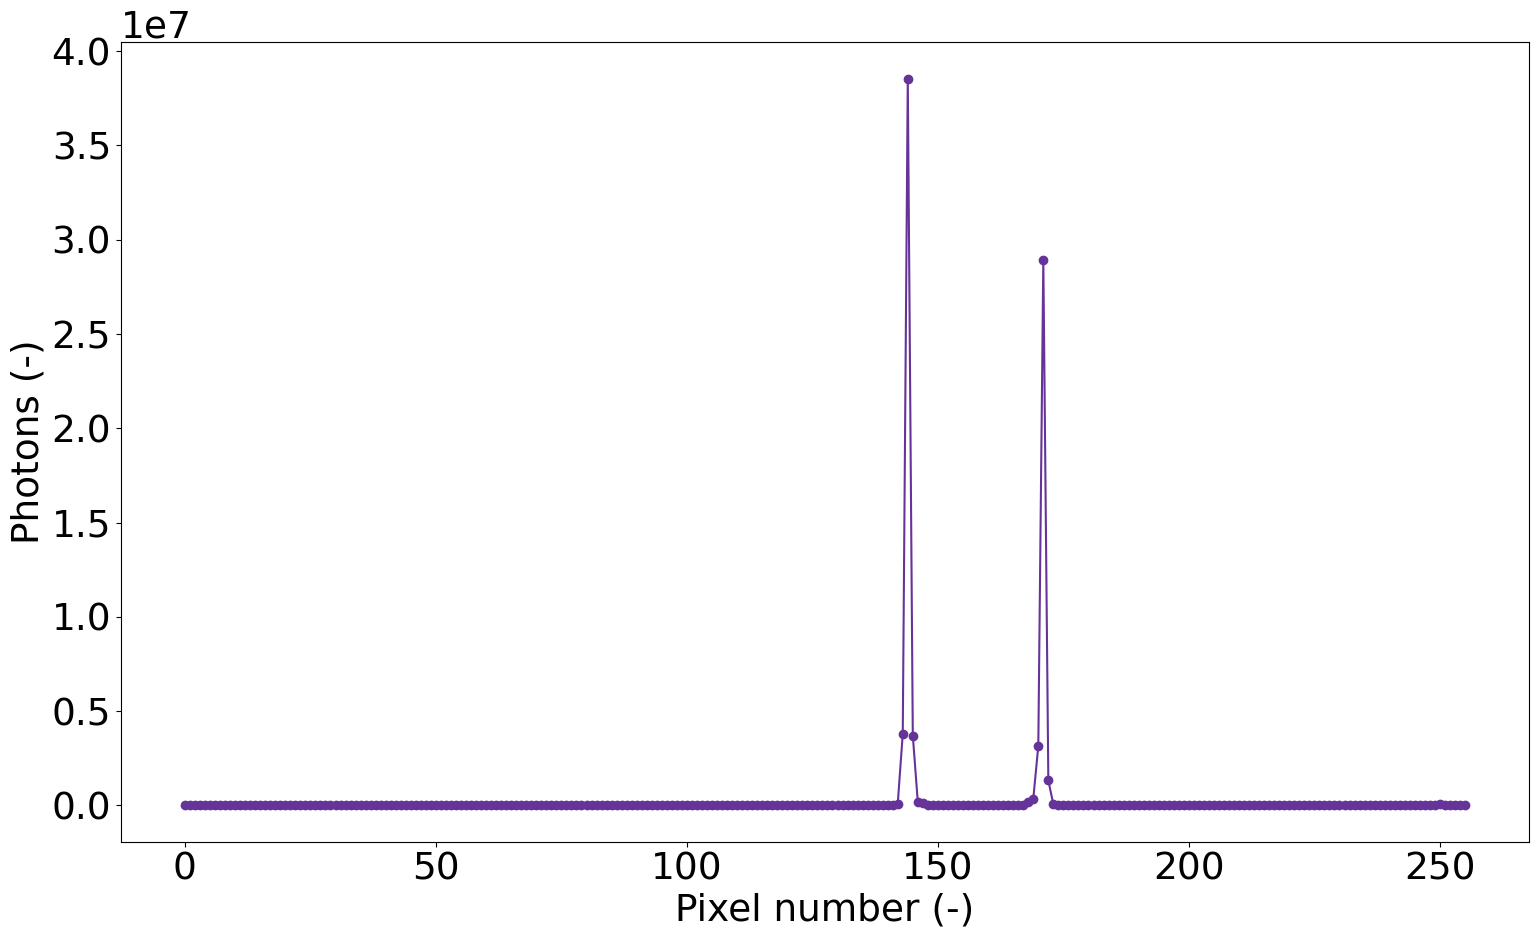

In [ ]:
# Standard run of the function
sensor_plot.plot_sensor_population(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
)

For a quick analyzis of the dataset to extract the number of the pixels where the light was focused (or the addresses of the hot pixels with the parameter 'app_mask' set to False; see below), one can use the parameter 'single_file' set to True. Including 'fit_peaks' set to True will help by finding all pixels where the number of photons detected is above the median*threshold_multiplier, where the latter can be used for direct control over the cutoff for choosing the pixels and by default is set to 10.

When the 'fit_peaks' parameter is set to True, the function will estimate the photon rate in each pixel found above the threshold.

In [ ]:
sensor_plot.plot_sensor_population(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
    single_file=True,
    fit_peaks=True,
)


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\Ne640\Ne640P < < <




> > > Plotting < < <

Fitting the peaks with gaussian
> > > The plot is saved as '{plot_name}_single_file.png'in {os.getcwd()} < < <


Sometimes, the default threshold_multiplier will be to low or to high. This parameter can be changes manually until only the pixels of interest are found.


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\Ne640\Ne640P < < <




> > > Plotting < < <

Fitting the peaks with gaussian
> > > The plot is saved as '{plot_name}_single_file.png'in {os.getcwd()} < < <


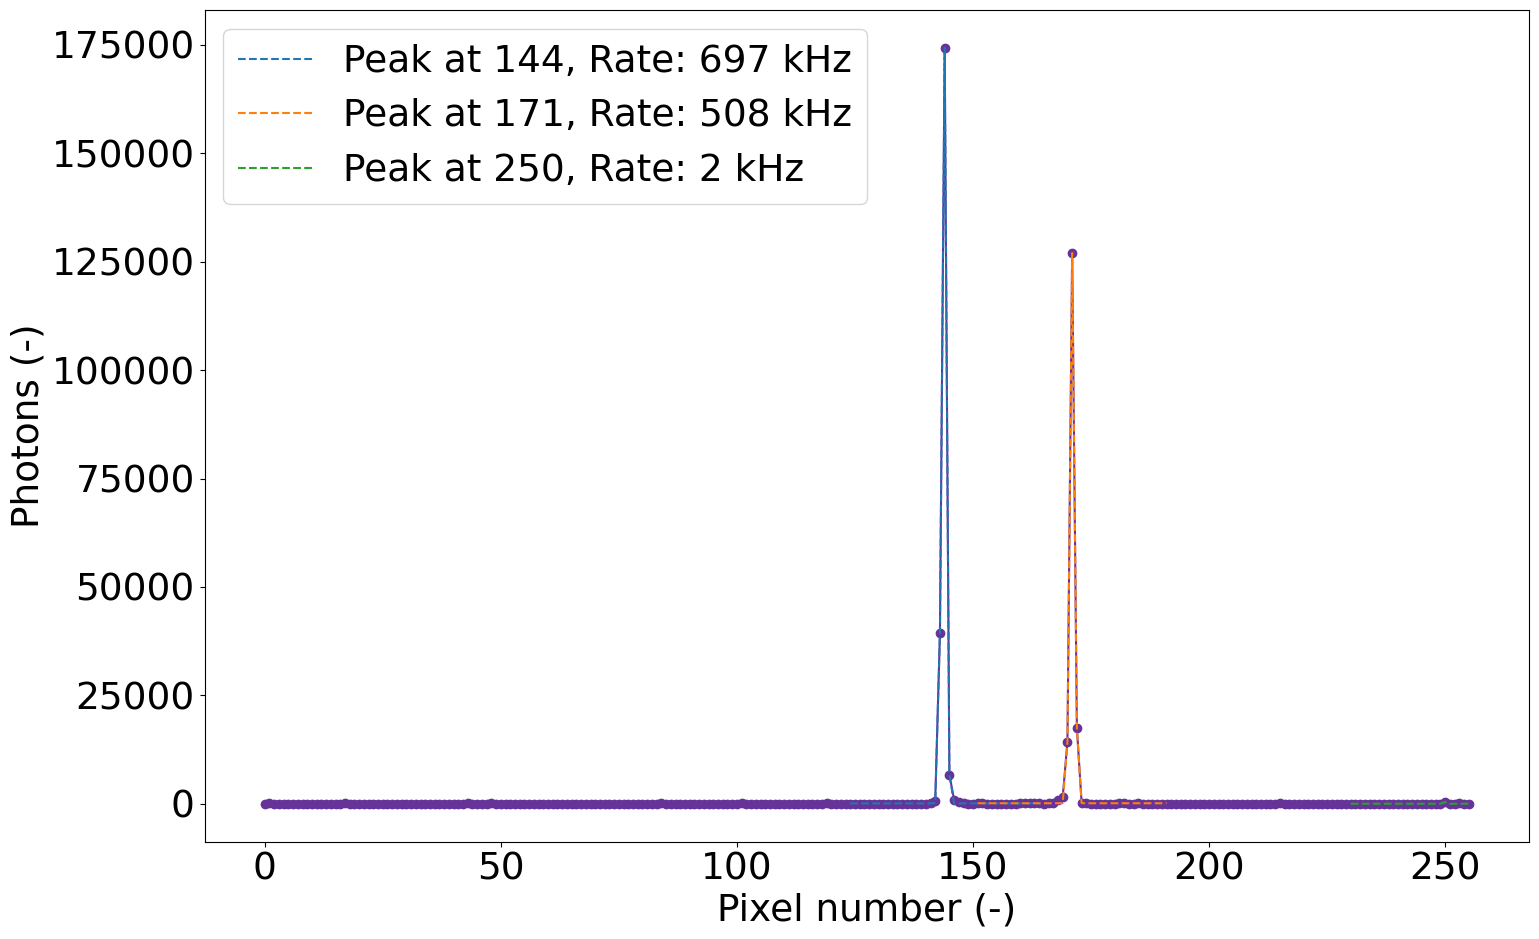

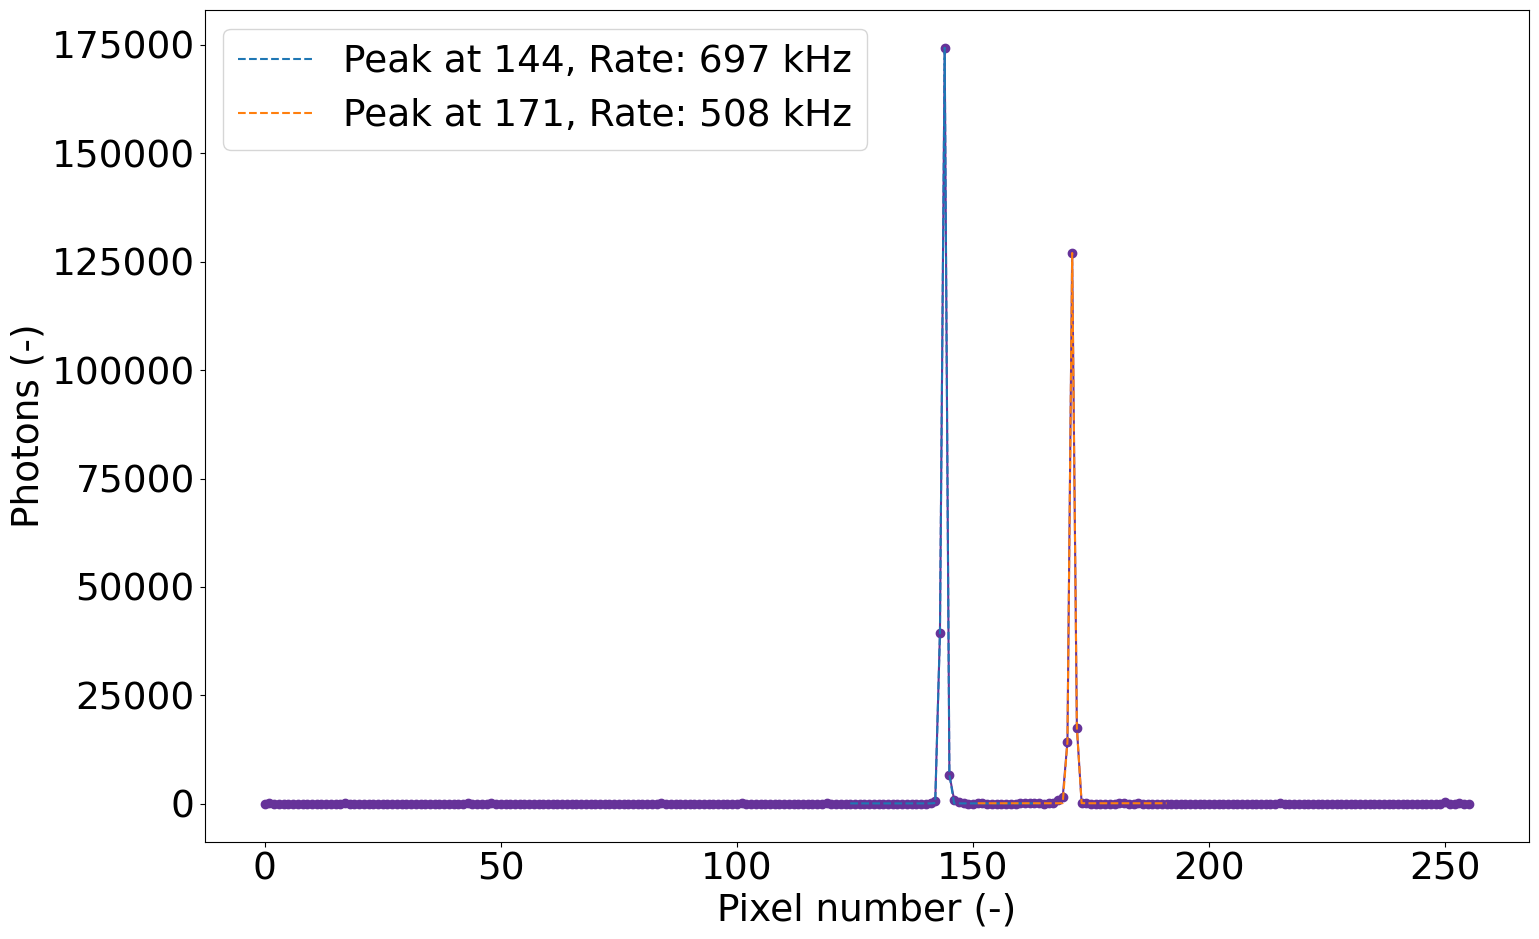

In [4]:
sensor_plot.plot_sensor_population(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
    single_file=True,
    fit_peaks=True,
    threshold_multiplier=12,
    show_fig=True
)

One can also use the same approach to plot the signal together with the hot pixels. This can be achieved to switching the parameter 'app_mask' to False.


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\Ne640\Ne640P < < <




> > > Plotting < < <

> > > The plot is saved as '{plot_name}_single_file.png'in {os.getcwd()} < < <


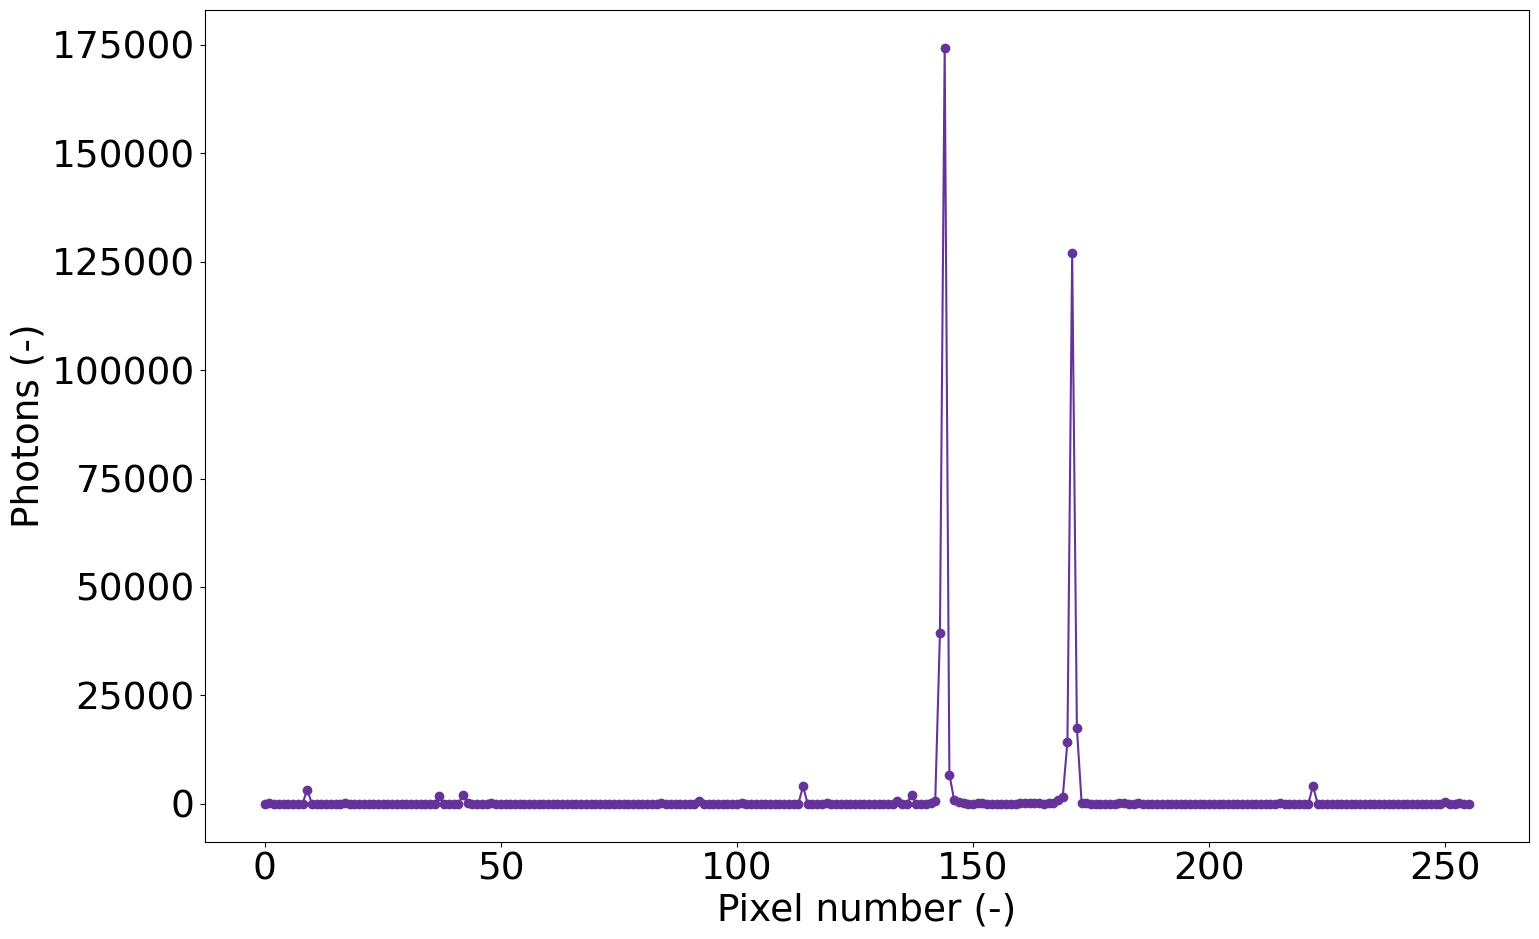

In [5]:
sensor_plot.plot_sensor_population(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
    single_file=True,
    show_fig=True,
    app_mask=False
)

Some of the parameters can be used to affect the scale of the y-axis, the style of the plot, and the color of the plot.


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\Ne640\Ne640P < < <




> > > Plotting < < <

> > > The plot is saved as '{plot_name}_single_file.png'in {os.getcwd()} < < <


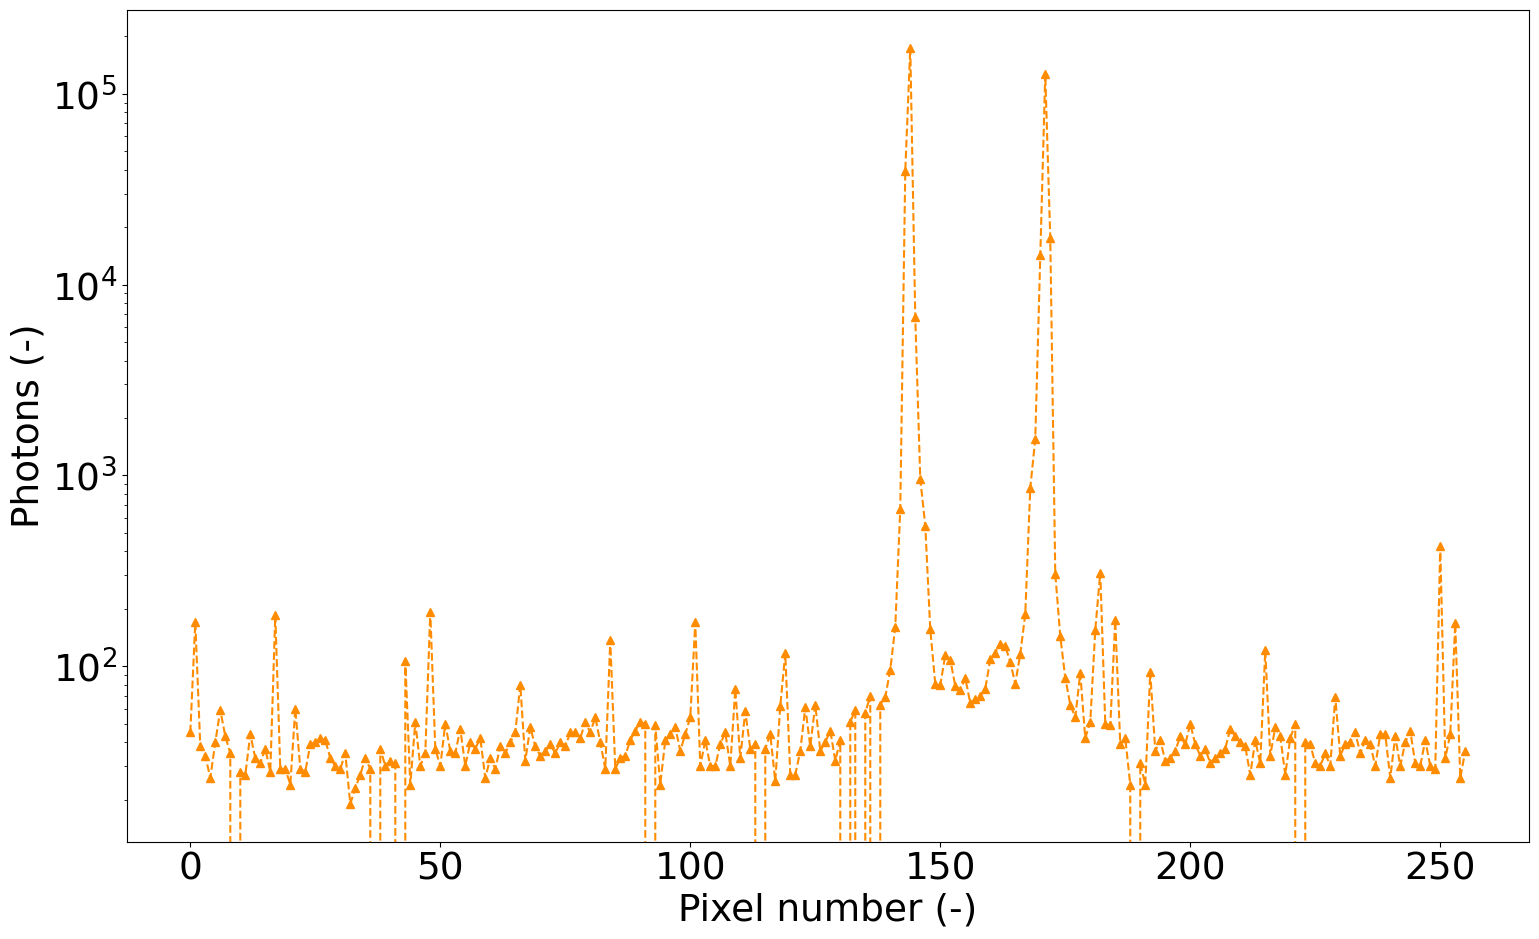

In [6]:
sensor_plot.plot_sensor_population(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
    single_file=True,
    show_fig=True,
    scale='log',
    style='^--',
    color="darkorange"
)

Sometimes, the more practical approach would be to pickle the plot using the 'pickle_fig' parameter to later unpickle the plot, extract the data, and replot with different axes labels, ranges, limits, etc.

In [6]:
sensor_plot.plot_sensor_population(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
    single_file=True,
    fit_peaks=True,
    pickle_fig=True,
)


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\Ne640\Ne640P < < <




> > > Plotting < < <

Fitting the peaks with gaussian
> > > The plot is saved as '{plot_name}_single_file.png'in {os.getcwd()} < < <


One can use the 'unpickle_plot' function from the 'sensor_plot' library. The only parameter is the absolute path to the '.pkl' file with the pickled plot. The function return the figure with the original plot, including the plot parameters, together with the plot data and all fits that were found. If there is a legend in the original pickled plot, it will be returned as well.

Peak at 144, Rate: 697 kHz
Peak at 171, Rate: 508 kHz
Peak at 250, Rate: 2 kHz


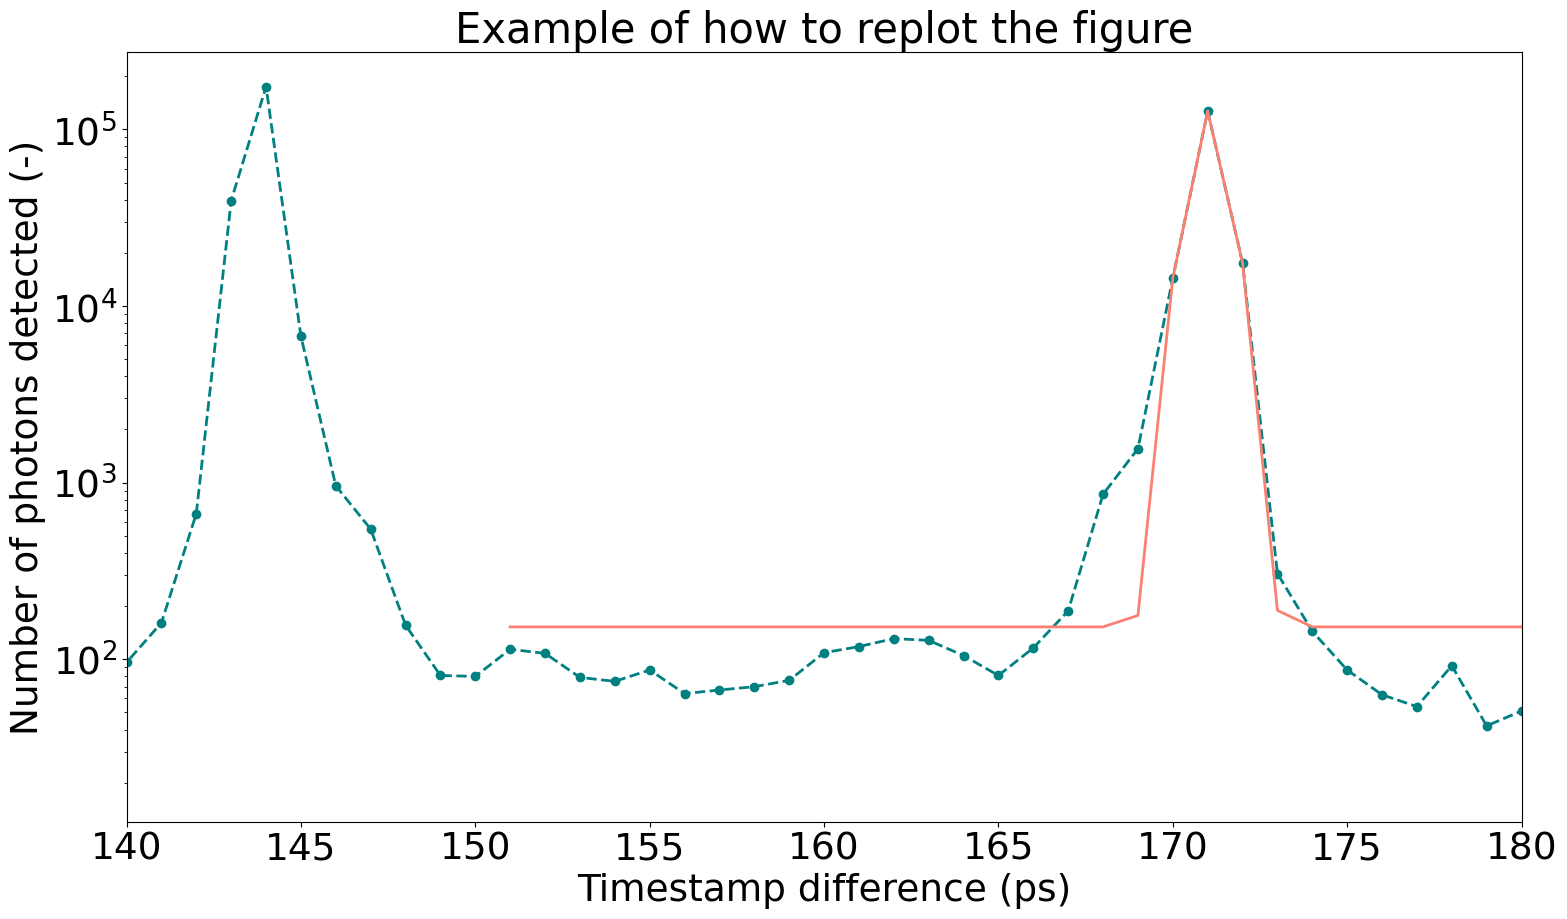

['Peak at 144, Rate: 697 kHz', 'Peak at 171, Rate: 508 kHz', 'Peak at 250, Rate: 2 kHz']


In [3]:
from matplotlib import pyplot as plt

# Absolute path to the '.pkl' file
plot_pkl_file = r"D:\LinoSPAD2\Data\B7d\Ne640\Ne640P\results\sensor_population\0000010933_single_file.pickle"

# Unpickle the plot; the function returns the original figure and the
# plot data
fig, data, labels_all = sensor_plot.unpickle_plot(plot_pkl_file,)

print(labels_all)

plt.close(fig)

# How to replot the plot data
fig_new = plt.figure(figsize=(18,10))
plt.rcParams.update({"font.size": 27})
plt.xlabel("Timestamp difference (ps)")
plt.ylabel("Number of photons detected (-)")
plt.title("Example of how to replot the figure", fontsize=30)
plt.xlim(140, 180)
plt.yscale('log')
plt.plot(data['Plot'][0], data['Plot'][1], 'o--', color="teal", linewidth=2)
plt.plot(data['Fit_2'][0], data['Fit_2'][1], color="salmon", linewidth=2)
plt.show(fig_new)

# How to extract the legend manually, if there is one
ax = fig.axes[0]
legend = ax.get_legend()
labels = [text.get_text() for text in legend.get_texts()]
print(labels)

